# Prodigy Infotech - Machine Learning Internship
## Task 1 - House Price Preditction Using Linear Regression
### Author: Muhammad Haroon Shahzad


 ## Problem Statement
Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

## Data Set link 
[Kaggle House Prices Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)



### import necessary libraries

```python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



### Load the Test and Train Data

In [3]:
test_df = pd.read_csv("test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
train_df = pd.read_csv("train.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Description of data

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
# Setting the Id column as the index
train_df = train_df.set_index("Id")
test_df = test_df.set_index("Id")
train_df.shape , test_df.shape

((1460, 80), (1459, 79))

In [9]:
missing_list = train_df.isna().sum().sort_values(ascending = False).head(n = 80)
missing_list

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [10]:
# Fraction of data missing in each column
percentage_missing = missing_list/train_df.shape[0]
percentage_missing

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
                 ...   
Heating        0.000000
HeatingQC      0.000000
MSZoning       0.000000
1stFlrSF       0.000000
SalePrice      0.000000
Length: 80, dtype: float64

In [11]:
# Setting a thresold to drop some selected features which have many missing values
columns_to_drop = percentage_missing[percentage_missing > 0.45].keys()
columns_to_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], dtype='object')

In [12]:
train_df.drop(columns_to_drop, axis = 1, inplace=True)
test_df.drop(columns_to_drop, axis = 1, inplace=True)

In [14]:
train_df.isna().sum().sort_values(ascending = False)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
MSZoning          0
SalePrice         0
Length: 74, dtype: int64

### The remaining missing values will be imputed using SimpleImputer of scikit-learn.

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
mean_imputer = SimpleImputer(missing_values= np.nan , strategy= 'mean') # Uses mean to impute
most_frequent_imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent') # Uses mode to impute
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median') # Uses median to impute

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


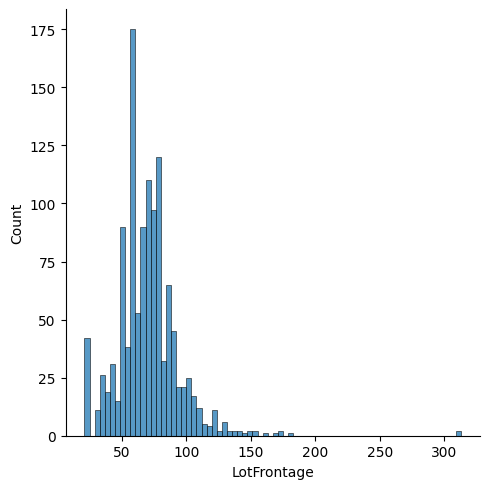

In [17]:
sns.displot(data = train_df, x = "LotFrontage")
plt.show()

In [18]:
train_df["LotFrontage"]=mean_imputer.fit_transform(train_df[["LotFrontage"]])
test_df["LotFrontage"]=mean_imputer.fit_transform(test_df[["LotFrontage"]])

In [19]:
train_df.isna().sum().sort_values(ascending = False).head(n=50)

GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
Electrical        1
WoodDeckSF        0
PavedDrive        0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
SaleCondition     0
BedroomAbvGr      0
SaleType          0
YrSold            0
MoSold            0
MiscVal           0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
PoolArea          0
Functional        0
Fireplaces        0
2ndFlrSF          0
ScreenPorch       0
3SsnPorch         0
GarageCars        0
GarageArea        0
EnclosedPorch     0
OpenPorchSF       0
MSSubClass        0
HeatingQC         0
1stFlrSF          0
OverallCond       0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0


In [20]:
categorical_missing = ["GarageCond", "GarageFinish", "GarageQual","GarageType",
"BsmtExposure","BsmtCond","BsmtQual","BsmtFinType2","BsmtFinType1"]

In [21]:
train_df[categorical_missing] = most_frequent_imputer.fit_transform(train_df[categorical_missing])
test_df[categorical_missing] = most_frequent_imputer.fit_transform(test_df[categorical_missing])

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


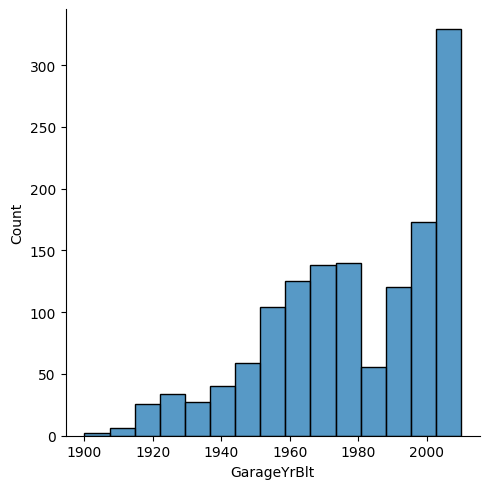

In [22]:
sns.displot(data = train_df, x="GarageYrBlt")
plt.show()

Finally, the GarageYrBit feature is skewed to the right. So, we use meadin to impute it's missing values.

In [23]:
train_df["GarageYrBlt"] = median_imputer.fit_transform(train_df[["GarageYrBlt"]])
test_df["GarageYrBlt"] = median_imputer.fit_transform(test_df[["GarageYrBlt"]])

In [24]:
train_df.isna().sum().sort_values(ascending = False).head(n=50)

MasVnrArea       8
Electrical       1
GarageYrBlt      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageType       0
MSSubClass       0
CentralAir       0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageFinish     0
HeatingQC        0
MSZoning         0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
dtype: int64

In [25]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)


In [26]:
print(train_df.isna().sum().sort_values(ascending = False))
print(train_df.shape)
print(test_df.shape)

MSSubClass      0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
ExterQual       0
MasVnrArea      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 74, dtype: int64
(1451, 74)
(1432, 73)


### Finally All missing values have been imputed ( Handled )

In [27]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


## Data Prepocessing

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [30]:
numerical_cols = train_df.select_dtypes(include = ['int64', 'float64']).columns.to_list()
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [31]:
categorical_cols = train_df.select_dtypes(include = ['object']).columns.to_list()
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [32]:
# Seperating features and values in the training data
X = train_df.drop('SalePrice', axis = 1)
y = train_df[['SalePrice']]
X,y

(      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
 Id                                                                            
 1             60       RL         65.0     8450   Pave      Reg         Lvl   
 2             20       RL         80.0     9600   Pave      Reg         Lvl   
 3             60       RL         68.0    11250   Pave      IR1         Lvl   
 4             70       RL         60.0     9550   Pave      IR1         Lvl   
 5             60       RL         84.0    14260   Pave      IR1         Lvl   
 ...          ...      ...          ...      ...    ...      ...         ...   
 1456          60       RL         62.0     7917   Pave      Reg         Lvl   
 1457          20       RL         85.0    13175   Pave      Reg         Lvl   
 1458          70       RL         66.0     9042   Pave      Reg         Lvl   
 1459          20       RL         68.0     9717   Pave      Reg         Lvl   
 1460          20       RL         75.0 

In [33]:
X.shape , y.shape

((1451, 73), (1451, 1))

Scaling the data using Standard Scaler

In [34]:
std_sc = StandardScaler()

In [35]:
def MyStandardScaler(df, col_names):
    features = df[col_names]
    std_sc.fit(features.values)
    features = std_sc.transform(features.values)
    df[col_names] = features
    return df

In [36]:
numerical_features = numerical_cols.copy()
numerical_features.remove('SalePrice')
X = MyStandardScaler(X , numerical_features)
test_df = MyStandardScaler(test_df, numerical_features)
std_sc.fit(y[['SalePrice']])
y = std_sc.transform(y[['SalePrice']])
y = y.reshape(-1)
X,y

(      MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
 Id                                                                             
 1       0.072441       RL    -0.228363 -0.205996   Pave      Reg         Lvl   
 2      -0.872386       RL     0.452424 -0.090876   Pave      Reg         Lvl   
 3       0.072441       RL    -0.092205  0.074297   Pave      IR1         Lvl   
 4       0.308648       RL    -0.455291 -0.095881   Pave      IR1         Lvl   
 5       0.072441       RL     0.633967  0.375612   Pave      IR1         Lvl   
 ...          ...      ...          ...       ...    ...      ...         ...   
 1456    0.072441       RL    -0.364520 -0.259352   Pave      Reg         Lvl   
 1457   -0.872386       RL     0.679353  0.266998   Pave      Reg         Lvl   
 1458    0.308648       RL    -0.182977 -0.146734   Pave      Reg         Lvl   
 1459   -0.872386       RL    -0.092205 -0.079164   Pave      Reg         Lvl   
 1460   -0.872386       RL  

### Encoding the categorical data in numerical form using Label Encoder

In [37]:
le = LabelEncoder()

In [38]:
for column in categorical_cols:
    X[column]=le.fit_transform(X[column])
    test_df[column]=le.fit_transform(test_df[column])

In [39]:
X.shape , test_df.shape

((1451, 73), (1432, 73))

### Splitting the data in training and testing sets

In [40]:
X_train , X_test, y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state=42)

In [41]:
print(X_train.shape, X_test.shape)
print(y_train.shape , y_test.shape)
print(test_df.shape)

(1160, 73) (291, 73)
(1160,) (291,)
(1432, 73)


In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
print(model.score(X_train, y_train))

0.8430760880342695


In [51]:
predictions = model.predict(X_test)

In [52]:
print(mean_absolute_error(y_test, predictions))

0.2514361344040576


In [53]:
print(r2_score(y_test, predictions))

0.8584774101578572


In [54]:
predictions = std_sc.inverse_transform(predictions.reshape(-1,1)) # We have to undo the scaling we did to obtain the actual house prices that we have predicted.
predictions

array([[383466.86751448],
       [162367.34665712],
       [131297.30113607],
       [213192.58847988],
       [245561.65302264],
       [201620.90610459],
       [224124.06833855],
       [157251.93471571],
       [147212.75341462],
       [ 91301.17027676],
       [342289.12394824],
       [119086.48206414],
       [223772.6314203 ],
       [153177.26982867],
       [210608.84886919],
       [221775.47717433],
       [226081.50585879],
       [208698.84039063],
       [203434.58978758],
       [366554.19223007],
       [176123.54630472],
       [304919.82130896],
       [133245.27790238],
       [309947.06674304],
       [144449.46636666],
       [223029.34130464],
       [193272.0440948 ],
       [180427.17361541],
       [166762.68004086],
       [119644.16359264],
       [123346.71372416],
       [222984.09316601],
       [252411.0661222 ],
       [214012.97344561],
       [ 94336.78189303],
       [135454.62184592],
       [120123.70274902],
       [135314.36157393],
       [1445

# End of The Code